In [91]:

from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

data = pd.read_csv('datasets/originals/combined.csv')

X = data[['pressure', 'temperature', 'vibration', 'volume_flow', 'Motor_power']]
y = data[['cooler_condition','internal_pump_leakage','hydraulic_accumulator','stable_flag']]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test) 

In [94]:
label_encoders = {}
for col in y_train.columns:
    le = LabelEncoder()
    y_train[col] = le.fit_transform(y_train[col])
    y_test[col] = le.transform(y_test[col])
    label_encoders[col] = le


In [95]:
y_train = y_train.values
y_test = y_test.values


In [96]:
gb_model = GradientBoostingClassifier(n_estimators=600, learning_rate=0.2, max_depth=3, random_state=42)
multi_model = MultiOutputClassifier(gb_model)

multi_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                           n_estimators=600,
                                                           random_state=42))

In [97]:
y_pred = multi_model.predict(X_test)

y_pred_decoded = pd.DataFrame(y_pred, columns=y.columns)
for col in y.columns:
    y_pred_decoded[col] = label_encoders[col].inverse_transform(y_pred_decoded[col])


In [98]:
for i, col in enumerate(y.columns):
    print(f"Classification Report for {col}:\n")
    print(classification_report(y_test[:, i], y_pred[:, i]))

overall_accuracy = sum(
    accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y.shape[1])
) / y.shape[1]
print("Overall Accuracy:", overall_accuracy)

Classification Report for cooler_condition:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       152
           1       0.96      1.00      0.98       135
           2       1.00      0.97      0.99       154

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441

Classification Report for internal_pump_leakage:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       228
           1       0.94      1.00      0.97       101
           2       1.00      0.96      0.98       112

    accuracy                           0.99       441
   macro avg       0.98      0.99      0.98       441
weighted avg       0.99      0.99      0.99       441

Classification Report for hydraulic_accumulator:

              precision    recall  f1-score   support

           0       0.98      0.95     

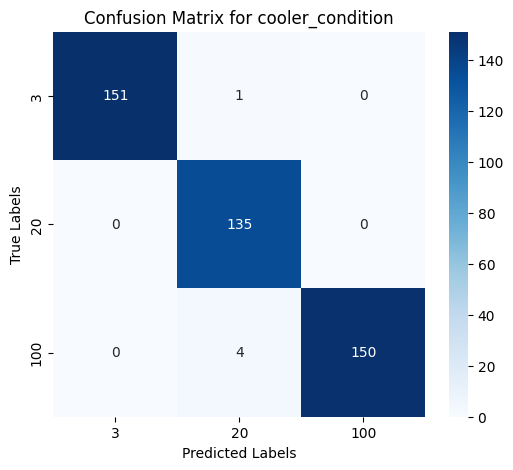

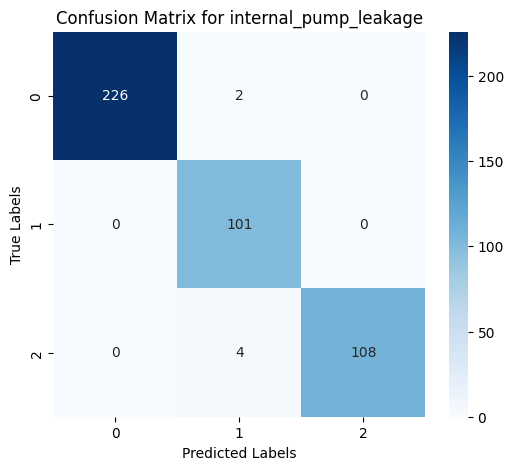

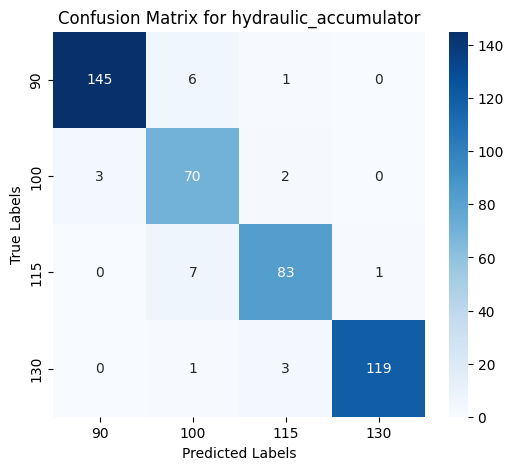

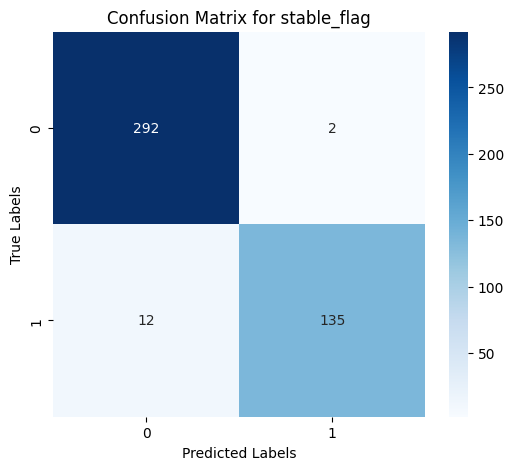

In [99]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(y.columns):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[col].classes_, yticklabels=label_encoders[col].classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {col}')
    plt.show()

In [101]:
import joblib

joblib.dump(multi_model, 'combined_model.pkl')
joblib.dump(scaler, 'combined_scaler.pkl')
joblib.dump(le, 'combined_label_encoder.pkl')

['combined_label_encoder.pkl']